# <div style="text-align: center;">Credit Risk Classification Model</div>


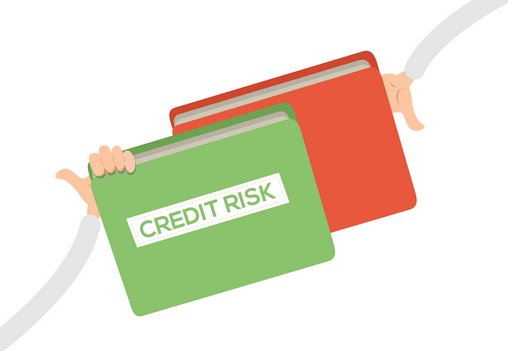

## Problem Statement  



Credit risk is a major challenge for financial institutions. Predicting whether a loan will default (loan_status = 1) or be repaid (loan_status = 0) is a classification problem that helps minimize losses. This project aims to predict loan defaults using borrower and loan features, assisting institutions in improving their lending decisions and managing credit risk more effectively.


## Objective:

The objective of this project is to analyze and preprocess data to build a classification model that predicts loan defaults. This involves performing exploratory data analysis (EDA) to understand key features like income and loan grade, engineering relevant features to enhance model performance, developing a classification model using techniques like Logistic Regression or Decision Trees, and evaluating its performance using metrics like accuracy and precision. The goal is to provide actionable insights for financial institutions to improve credit approval and reduce default rates.

Data Source : https://www.kaggle.com/datasets/rizqi01/ps4e9-original-data-loan-approval-prediction

### About The Dataset:
This dataset provides detailed financial, demographic, and loan-specific information on individuals, making it ideal for building predictive models to assess credit risk and loan default probability. Designed to reflect key variables commonly used in credit risk analysis, it includes a variety of indicators that can help researchers and practitioners build robust models for predicting loan outcomes.

### Features 

- **person_age**: The age of the individual in years. Age can often be a proxy for life stage, impacting income stability and financial behaviors.
- **person_income**: Annual income of the individual, in dollars. Income level can influence an individual's ability to manage loan repayments, making it a crucial variable in credit scoring.
- **person_home_ownership**: The type of home ownership, which indicates the individual's housing situation, such as RENT, OWN, or MORTGAGE. This factor can indirectly signal economic stability.
- **person_emp_length**: Length of employment in months, representing job stability. Longer employment history might correlate with income stability and reduced risk.
- **loan_intent**: The primary purpose of the loan, categorized as PERSONAL, EDUCATION, MEDICAL, etc. Understanding the intent behind loan requests helps in assessing loan repayment likelihood, as different loan types have unique risk profiles.
- **loan_grade**: A categorical variable representing the risk grade assigned to the loan, with grades from A (low risk) to D (high risk). Loan grades summarize an assessment of default risk and are often used as input in financial modeling.
- **loan_amnt**: The total amount of the loan requested by the individual, in dollars. Loan size often correlates with risk, as higher loan amounts might present greater repayment challenges.
- **loan_int_rate**: The interest rate assigned to the loan, indicating the cost of borrowing. Higher interest rates might imply higher risk, as they are typically assigned to riskier profiles.
- **loan_status**: A binary indicator of loan repayment status, where 1 indicates loan default and 0 indicates successful repayment. This serves as the target variable for predictive modeling tasks.
- **loan_percent_income**: The ratio of the loan amount to the individual’s income, providing an income-relative measure of debt burden. Higher values may indicate greater financial strain.
- **cb_person_default_on_file**: A categorical variable indicating if the individual has previously defaulted (Y for Yes, N for No). This historical record can be an essential predictor of future credit risk.
- **cb_person_cred_hist_length**: The length of the individual's credit history in years, with longer histories potentially indicating more experience with managing credit.


## Loading And Preprocessing

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('credit_risk_dataset.csv')

In [3]:
df.shape

(32581, 12)

In [4]:
# displays top 5 rows
df.head

<bound method NDFrame.head of        person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt 

In [5]:
df.tail

<bound method NDFrame.tail of        person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt 

In [6]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [7]:
# Dropping the 'person_emp_length' column
df.drop('person_emp_length', axis=1, inplace=True)

In [8]:
df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace=True)

In [9]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   loan_intent                 32581 non-null  object 
 4   loan_grade                  32581 non-null  object 
 5   loan_amnt                   32581 non-null  int64  
 6   loan_int_rate               32581 non-null  float64
 7   loan_status                 32581 non-null  int64  
 8   loan_percent_income         32581 non-null  float64
 9   cb_person_default_on_file   32581 non-null  object 
 10  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 2.7+ MB


In [11]:
df.describe()

,person_age,person_income,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,9589.371106,11.009620,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,6322.086646,3.081611,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,12200.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,35000.000000,23.220000,1.000000,0.830000,30.000000


In [12]:
duplicate_rows = df.duplicated().sum()

print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 168


In [13]:
df = df.drop_duplicates()

In [14]:
# Check the shape of the dataset
df.shape

(32413, 11)

# Exploraratory Data Analysis (EDA)

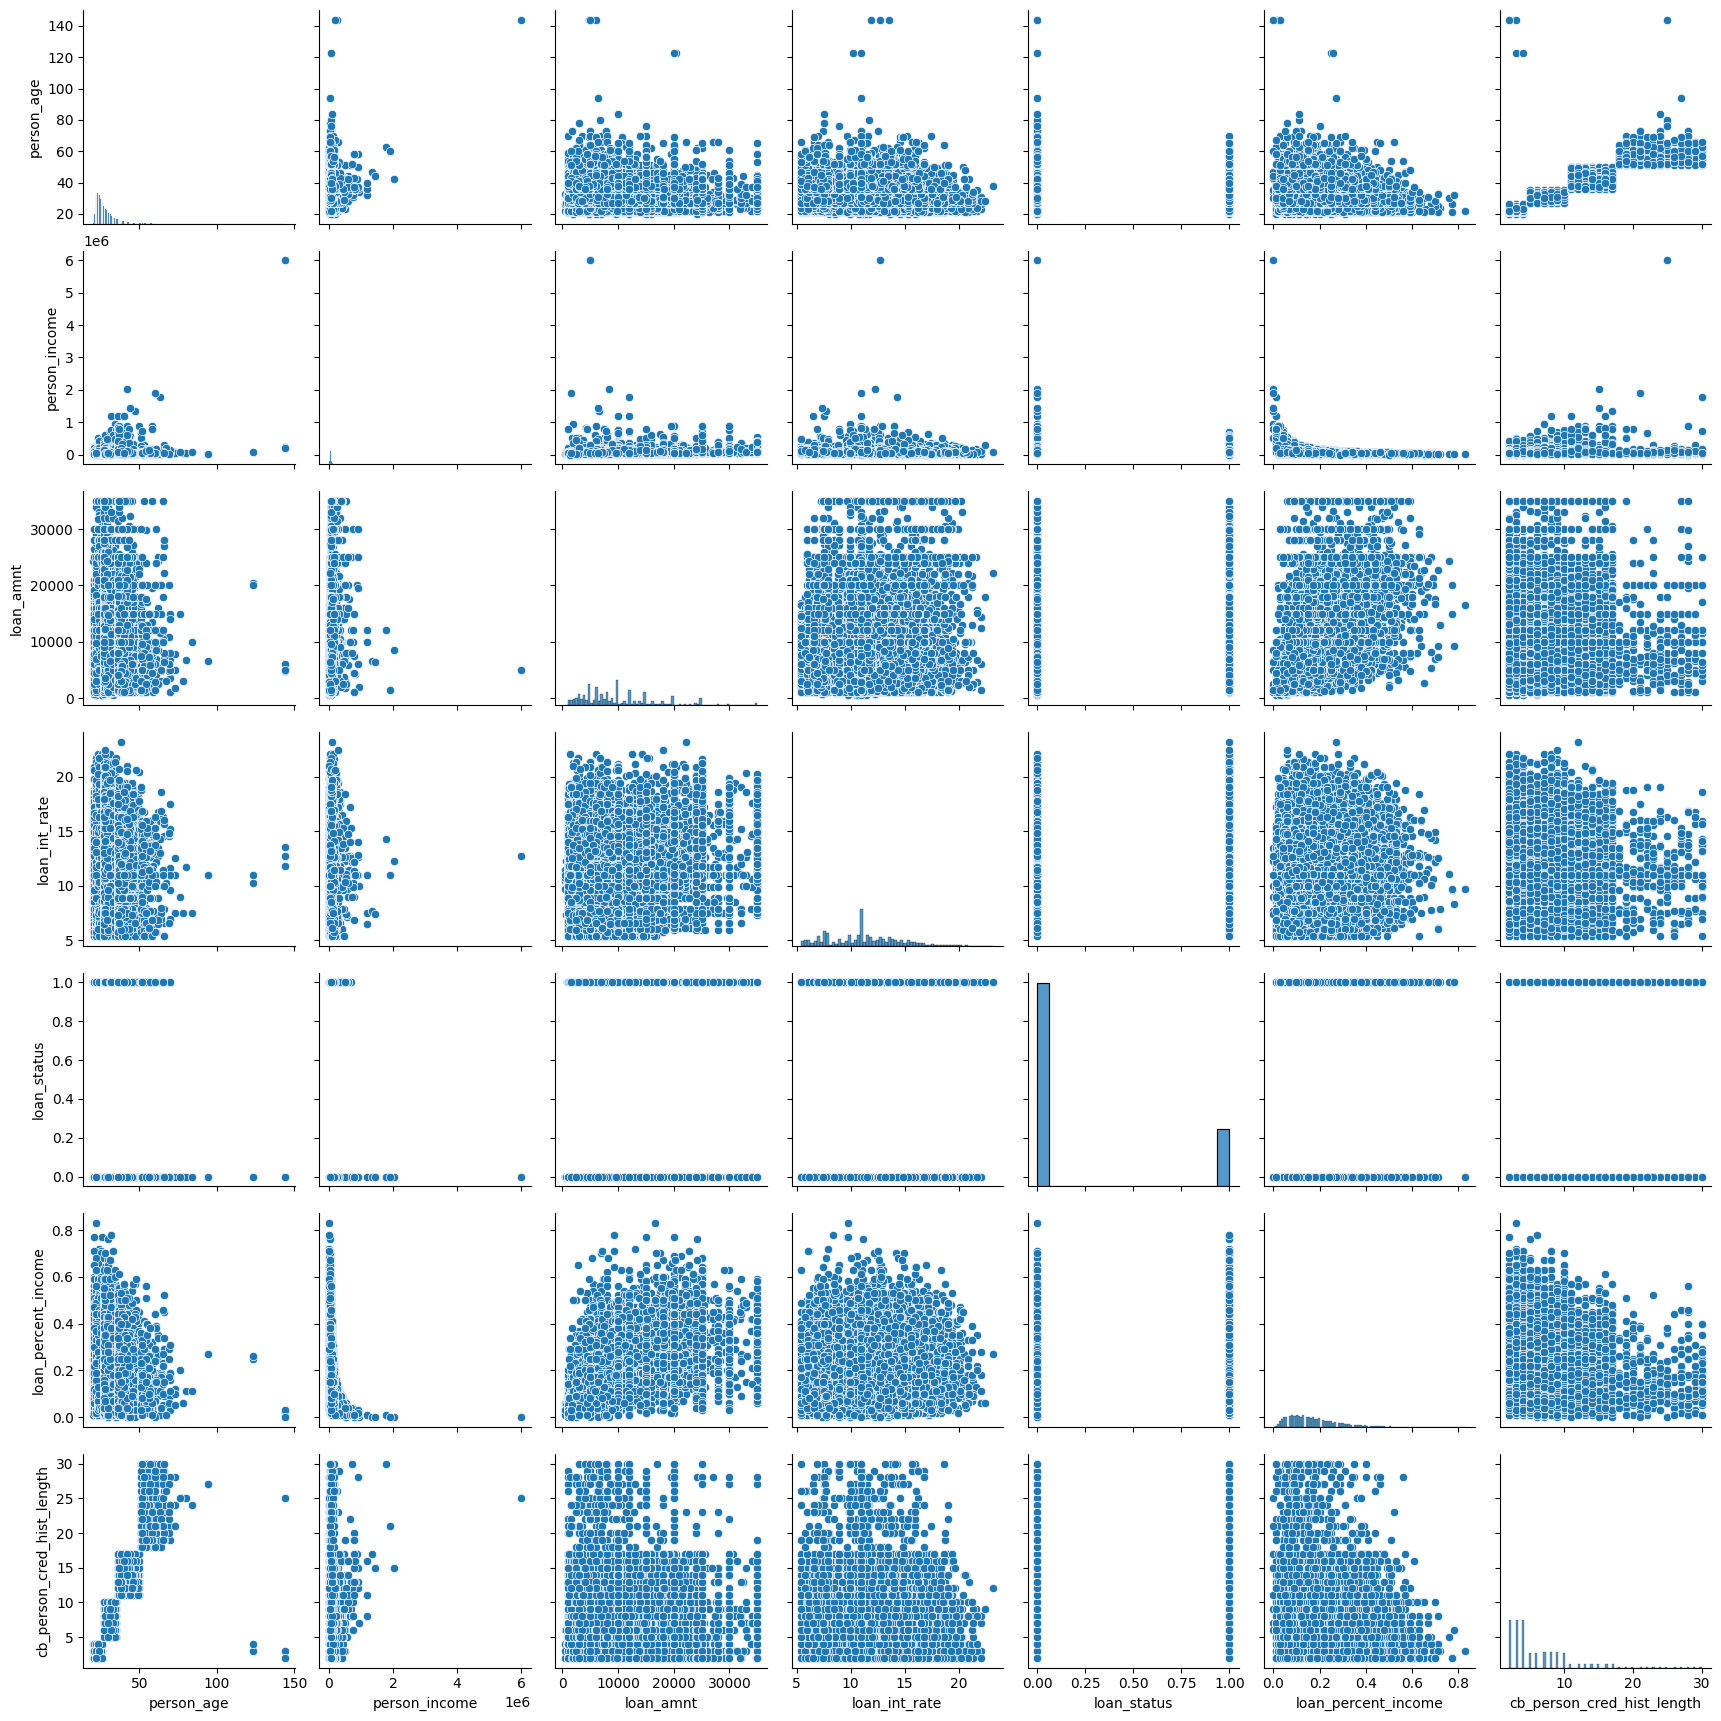

In [15]:
sns.pairplot(df)
plt.show()

This appears to be a correlation scatter plot matrix showing relationships between various loan and borrower characteristics. Here are the key insights in a concise paragraph:

The scatter plot matrix reveals several significant patterns in the loan data: there's a notable positive relationship between loan amount and loan percentage of income, while age shows a strong correlation with credit history length (as evidenced by the clear linear pattern). Loan interest rates appear more dispersed with higher values showing increased variability, suggesting risk-based pricing. The binary nature of loan status (shown as horizontal lines) indicates a categorical outcome variable, while income distributions show typical right-skewed patterns common in financial data. Most relationships appear non-linear, suggesting complex interactions between variables that would require sophisticated modeling approaches.

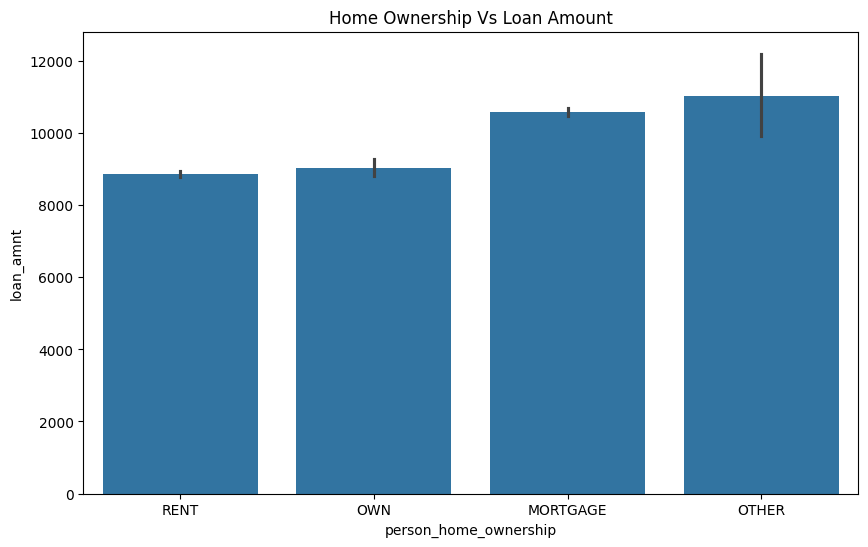

In [16]:
plt.figure(figsize = (10,6))
sns.barplot(data = df, x = 'person_home_ownership', y = 'loan_amnt')
plt.title('Home Ownership Vs Loan Amount')
plt.show()

The graph reveals interesting patterns in loan amounts across different home ownership categories. Mortgage holders and those in the 'OTHER' category receive notably higher average loan amounts (around 10,500-11,000) compared to renters and homeowners (approximately 8,900). This significant disparity suggests that mortgage holders, despite having existing housing debt, are considered more creditworthy and can access larger loans, possibly due to their demonstrated ability to manage significant financial commitments and having property as collateral. The similar lower loan amounts for renters and outright homeowners is particularly noteworthy.

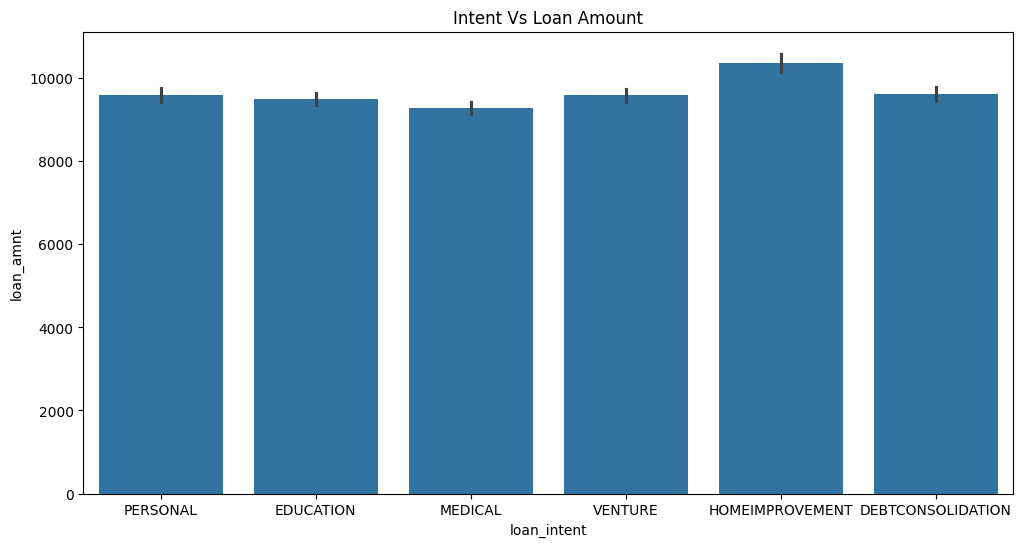

In [17]:
plt.figure(figsize = (12,6))
sns.barplot(data = df, x = 'loan_intent', y = 'loan_amnt')
plt.title('Intent Vs Loan Amount')
plt.show()

The loan amount distribution across different intents reveals that home improvement loans have the highest average amount (approximately 10,300), followed by personal loans and venture loans (around 9,500 each). Medical loans show the lowest average amount (about 9,200), suggesting they might be for more immediate, shorter-term healthcare needs. The relatively small variation in average loan amounts (ranging roughly from 9,200 to 10,300) across all intents indicates that the lending institution maintains consistent lending ranges regardless of the loan purpose, though they're slightly more generous with home improvement loans, likely due to the tangible asset backing.

In [18]:
numerical_cols = df.select_dtypes(include=['number'])

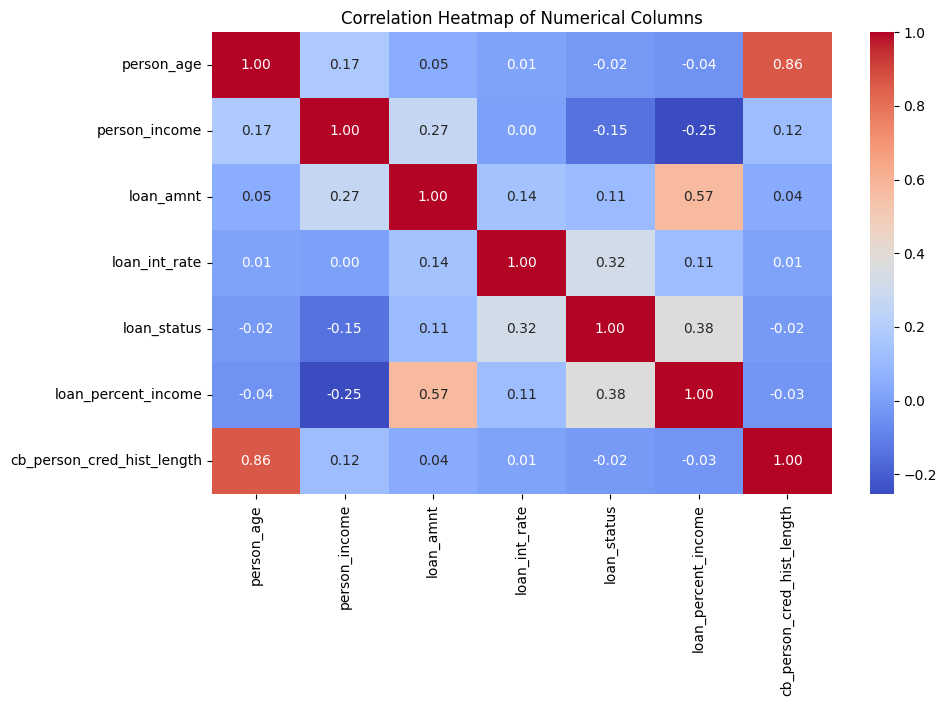

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for numerical columns
corr_matrix = numerical_cols.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Add title
plt.title('Correlation Heatmap of Numerical Columns')

# Show the plot
plt.show()


The correlation heatmap reveals several key insights about loan relationships. The strongest correlation (0.86) exists between a person's age and credit history length, which is logically expected. Notably, loan risk factors emerge through moderate positive correlations: both loan-to-income ratio (0.38) and interest rates (0.32) show positive correlations with loan status, suggesting these are important indicators of loan performance. Higher income borrowers tend to take relatively smaller loans compared to their income, shown by the negative correlation (-0.25) between income and loan percent of income. Most other variables show weak correlations, indicating they operate relatively independently in determining loan outcomes.

In [20]:
value_count_target=df['loan_status'].value_counts()
value_count_target

loan_status
0    25324
1     7089
Name: count, dtype: int64

# Oversampling

In [21]:
from sklearn.utils import resample

# Separate the majority and minority classes
majority = df[df['loan_status'] == 0]
minority = df[df['loan_status'] == 1]

# Oversample the minority class
minority_oversampled = resample(minority, 
                                replace=True, 
                                n_samples=len(majority), 
                                random_state=42)

# Combine the oversampled minority with the majority
df = pd.concat([majority, minority_oversampled])

# Check the new class distribution
print(df['loan_status'].value_counts())


loan_status
0    25324
1    25324
Name: count, dtype: int64


#  Countplot Of Target Variable

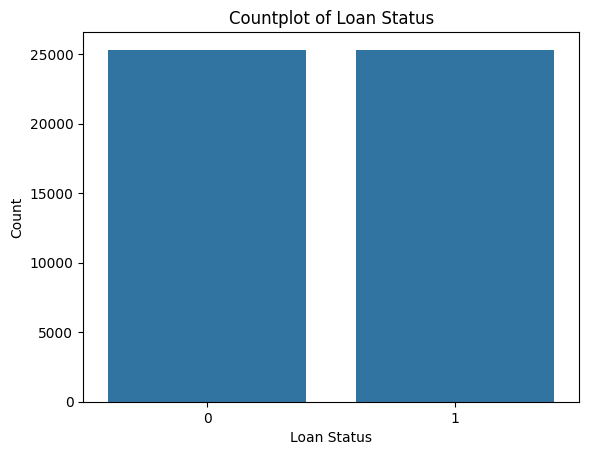

In [22]:
#countplot
import seaborn as sns
import matplotlib.pyplot as plt

# Create a countplot for loan_status
sns.countplot(x='loan_status', data=df)

# Add labels and title
plt.title('Countplot of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')

# Show the plot
plt.show()

The loan status distribution reveals a remarkably balanced dataset with approximately 25,000 cases in each category (0 and 1). This even split suggests either careful data sampling for analytical purposes or a natural 50-50 distribution in loan outcomes. Such balance is particularly valuable for machine learning applications as it helps avoid bias in predictive models, though to fully understand its business implications, we'd need to know what these binary categories specifically represent in terms of loan outcomes.

# Label Encoding For Ordinal Column

In [23]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each specified column
df['loan_grade'] = label_encoder.fit_transform(df['loan_grade'])
print(df)

       person_age  person_income person_home_ownership        loan_intent  \
1              21           9600                   OWN          EDUCATION   
14             23         115000                  RENT          EDUCATION   
15             23         500000              MORTGAGE  DEBTCONSOLIDATION   
16             23         120000                  RENT          EDUCATION   
20             25         162500                  RENT            VENTURE   
...           ...            ...                   ...                ...   
1127           24          50000                  RENT           PERSONAL   
6053           21          18000                  RENT  DEBTCONSOLIDATION   
4099           24          15000                  RENT  DEBTCONSOLIDATION   
18265          29          40000                  RENT  DEBTCONSOLIDATION   
3707           22          19200                  RENT            VENTURE   

       loan_grade  loan_amnt  loan_int_rate  loan_status  loan_percent_inco

# One Hot Encoding For Nominal Column

In [24]:
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder(sparse_output = False ,handle_unknown = 'ignore')

nom_col = ['person_home_ownership','loan_intent','cb_person_default_on_file']

# Perform one-hot encoding
encoded_data = one_hot.fit_transform(df[nom_col])

# Convert to DataFrame and reset index
df_encoded = pd.DataFrame(encoded_data, columns=one_hot.get_feature_names_out(nom_col)).reset_index(drop=True)

# Drop the original columns and reset index
df = df.drop(columns=nom_col).reset_index(drop=True)

# Concatenate DataFrames
df = pd.concat([df, df_encoded], axis=1)

df

,person_age,person_income,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,21,9600,1,1000,11.14,0,0.10,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,23,115000,0,35000,7.90,0,0.30,4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,23,500000,1,30000,10.65,0,0.06,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,23,120000,0,35000,7.90,0,0.29,4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,25,162500,0,35000,7.49,0,0.22,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50643,24,50000,2,17000,13.79,1,0.34,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
50644,21,18000,2,5800,14.72,1,0.32,4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50645,24,15000,2,4200,13.11,1,0.28,2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50646,29,40000,1,23500,11.12,1,0.59,8,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50648 entries, 0 to 50647
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      50648 non-null  int64  
 1   person_income                   50648 non-null  int64  
 2   loan_grade                      50648 non-null  int32  
 3   loan_amnt                       50648 non-null  int64  
 4   loan_int_rate                   50648 non-null  float64
 5   loan_status                     50648 non-null  int64  
 6   loan_percent_income             50648 non-null  float64
 7   cb_person_cred_hist_length      50648 non-null  int64  
 8   person_home_ownership_MORTGAGE  50648 non-null  float64
 9   person_home_ownership_OTHER     50648 non-null  float64
 10  person_home_ownership_OWN       50648 non-null  float64
 11  person_home_ownership_RENT      50648 non-null  float64
 12  loan_intent_DEBTCONSOLIDATION   

In [26]:
df.isnull().sum()

person_age                        0
person_income                     0
loan_grade                        0
loan_amnt                         0
loan_int_rate                     0
loan_status                       0
loan_percent_income               0
cb_person_cred_hist_length        0
person_home_ownership_MORTGAGE    0
person_home_ownership_OTHER       0
person_home_ownership_OWN         0
person_home_ownership_RENT        0
loan_intent_DEBTCONSOLIDATION     0
loan_intent_EDUCATION             0
loan_intent_HOMEIMPROVEMENT       0
loan_intent_MEDICAL               0
loan_intent_PERSONAL              0
loan_intent_VENTURE               0
cb_person_default_on_file_N       0
cb_person_default_on_file_Y       0
dtype: int64

# Feature Selection

In [27]:
#split the data
x=df.drop('loan_status',axis=1)
y=df['loan_status']

# Random Forest Feature Selection

In [28]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
rfe=RFE(estimator=model,n_features_to_select=10)
x_rfe=rfe.fit_transform(x,y)

#get the selected features
selected_features=x.columns[rfe.support_]
print("selected features:",selected_features)

model.fit(x,y)
feature_importances=model.feature_importances_
importance_df=pd.DataFrame({'feature':x.columns,'importance':feature_importances})
importance_df=importance_df.sort_values(by='importance', ascending=False)
print("feature importances:\n",importance_df)

selected features: Index(['person_age', 'person_income', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'person_home_ownership_MORTGAGE', 'person_home_ownership_RENT',
       'loan_intent_MEDICAL'],
      dtype='object')
feature importances:
                            feature  importance
5              loan_percent_income    0.207643
1                    person_income    0.174021
2                       loan_grade    0.132475
4                    loan_int_rate    0.126634
3                        loan_amnt    0.091589
0                       person_age    0.058811
6       cb_person_cred_hist_length    0.044326
10      person_home_ownership_RENT    0.037697
7   person_home_ownership_MORTGAGE    0.022697
9        person_home_ownership_OWN    0.017130
13     loan_intent_HOMEIMPROVEMENT    0.014317
14             loan_intent_MEDICAL    0.012379
11   loan_intent_DEBTCONSOLIDATION    0.012341
16             loan_intent_VENTURE 

# Selectkbest Featureselection

In [29]:
from sklearn.feature_selection import SelectKBest,f_classif
#select top 10 features
selector=SelectKBest(f_classif,k=10)
x_select=selector.fit_transform(x,y)


#selected features and their scores
selected_features=selector.get_support()
scores=selector.scores_

#get the features names
selected_feature_names=x.columns[selected_features]
print("selected features:",selected_feature_names)


#create a dataframes
feature_scores=pd.DataFrame({'feature':x.columns,'score':scores})

#sort by scores
feature_scores=feature_scores.sort_values(by='score',ascending=False)
print(feature_scores)


selected features: Index(['person_income', 'loan_grade', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')
                           feature        score
2                       loan_grade  9735.517338
5              loan_percent_income  9616.392654
4                    loan_int_rate  7729.617966
10      person_home_ownership_RENT  4833.012935
7   person_home_ownership_MORTGAGE  2967.373153
1                    person_income  2108.244115
17     cb_person_default_on_file_N  1947.038574
18     cb_person_default_on_file_Y  1947.038574
9        person_home_ownership_OWN  1053.322163
3                        loan_amnt   753.219357
16             loan_intent_VENTURE   512.097992
11   loan_intent_DEBTCONSOLIDATION   378.118100
12           loan_intent_EDUCATION   251.264340
14             loan

#  Test Split

In [30]:
from sklearn.model_selection import train_test_split
#train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Normalization

In [31]:
from sklearn.preprocessing import StandardScaler

#standardize the data
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# Model Implimentation

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Descision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'MLP Classifier': MLPClassifier()
}


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


results = {}
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_proba = model.predict_proba(x_test)

    # Store results
    results[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'Confusion_matrix': confusion_matrix(y_test, y_pred)
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
results_df

,Accuracy,Precision,Recall,F1 Score,Confusion_matrix
Logistic Regression,0.780355,0.785274,0.774941,0.780073,"[[3959, 1079], [1146, 3946]]"
Descision Tree Classifier,0.94926,0.919692,0.985075,0.951261,"[[4600, 438], [76, 5016]]"
Random Forest Classifier,0.976209,0.968334,0.984878,0.976536,"[[4874, 164], [77, 5015]]"
Gradient Boosting Classifier,0.854294,0.903932,0.79458,0.845736,"[[4608, 430], [1046, 4046]]"
MLP Classifier,0.855183,0.901084,0.799686,0.847362,"[[4591, 447], [1020, 4072]]"


# Hyper Parameter Tuning

In [34]:
# Hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200],     
    'max_depth': [10, 20],      
    'min_samples_split': [2, 5],  
    'min_samples_leaf': [1, 2],      
    'bootstrap': [True, False]               
}
    
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = -1, scoring = 'accuracy')

grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print("Best Parameter :", best_params)

best_rf = grid_search.best_estimator_
print("Best Estimator:", best_rf)

Best Parameter : {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Estimator: RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=200)


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Define the best estimator with the tuned parameters
best_rf = RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100)

# Fit the model on the training data
best_rf.fit(x_train, y_train)

# Predict on training and test sets
y_train_pred = best_rf.predict(x_train)
y_test_pred = best_rf.predict(x_test)

# Evaluate on the test set
print("Test Set Evaluation Metrics:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1 Score:", f1_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


Test Set Evaluation Metrics:
Accuracy: 0.9773938795656466
Precision: 0.9770453207769276
Recall: 0.9780047132757266
F1 Score: 0.9775247816272451
Confusion Matrix:
 [[4921  117]
 [ 112 4980]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      5038
           1       0.98      0.98      0.98      5092

    accuracy                           0.98     10130
   macro avg       0.98      0.98      0.98     10130
weighted avg       0.98      0.98      0.98     10130



In [43]:
import pandas as pd
import numpy as np
import os
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import RFE, SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

class CreditRiskTrainingPipeline:
    def __init__(self, data_path):
        """
        Initialize pipeline with dataset path
        """
        self.df = pd.read_csv(data_path)
        self.label_encoder = LabelEncoder()
        self.onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        self.scaler = StandardScaler()
        
    def preprocess_data(self):
        """
        Preprocess the training data
        """
        # Drop 'person_emp_length' column
        self.df.drop('person_emp_length', axis=1, inplace=True)
        
        # Fill missing 'loan_int_rate' with median
        self.df['loan_int_rate'].fillna(self.df['loan_int_rate'].median(), inplace=True)
        
        # Handle duplicate rows
        self.df.drop_duplicates(inplace=True)
        
        # Handle imbalanced dataset via oversampling
        majority = self.df[self.df['loan_status'] == 0]
        minority = self.df[self.df['loan_status'] == 1]
        minority_oversampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)
        self.df = pd.concat([majority, minority_oversampled])
        
        # Encode loan_grade
        self.df['loan_grade'] = self.label_encoder.fit_transform(self.df['loan_grade'])
        
        # One-hot encoding for categorical columns
        nom_col = ['person_home_ownership', 'loan_intent', 'cb_person_default_on_file']
        encoded_data = self.onehot_encoder.fit_transform(self.df[nom_col])
        df_encoded = pd.DataFrame(
            encoded_data,
            columns=self.onehot_encoder.get_feature_names_out(nom_col)
        ).reset_index(drop=True)
        
        # Drop original categorical columns and concatenate encoded ones
        self.df = self.df.drop(columns=nom_col).reset_index(drop=True)
        self.df = pd.concat([self.df, df_encoded], axis=1)
            
    def feature_selection(self):
        """
        Perform feature selection
        """
        X = self.df.drop('loan_status', axis=1)
        y = self.df['loan_status']
        
        # Feature selection using RFE
        model = RandomForestClassifier()
        rfe = RFE(estimator=model, n_features_to_select=10)
        self.X_rfe = rfe.fit_transform(X, y)
        self.selected_features_rfe = X.columns[rfe.support_]
        
        # Feature selection using SelectKBest
        selector = SelectKBest(f_classif, k=10)
        self.X_select = selector.fit_transform(X, y)
        self.selected_features_select = X.columns[selector.get_support()]
    
    def split_and_scale_data(self):
        """
        Split data into train and test sets and scale features
        """
        X = self.df.drop('loan_status', axis=1)
        y = self.df['loan_status']
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )
        
        # Scale the data
        self.X_train = self.scaler.fit_transform(self.X_train)
        self.X_test = self.scaler.transform(self.X_test)
        
        # Convert to dataframe maintaining column names
        self.X_train = pd.DataFrame(self.X_train, columns=X.columns)
        self.X_test = pd.DataFrame(self.X_test, columns=X.columns)

    def model_training(self):
        """
        Train multiple models and store results
        """
        self.models = {
            'Logistic Regression': LogisticRegression(),
            'Decision Tree': DecisionTreeClassifier(),
            'Random Forest': RandomForestClassifier(),
            'Gradient Boosting': GradientBoostingClassifier(),
            'MLP Classifier': MLPClassifier()
        }

        self.results = {}
        for model_name, model in self.models.items():
            model.fit(self.X_train, self.y_train)
            y_pred = model.predict(self.X_test)

            self.results[model_name] = {
                'Accuracy': accuracy_score(self.y_test, y_pred),
                'Precision': precision_score(self.y_test, y_pred),
                'Recall': recall_score(self.y_test, y_pred),
                'F1 Score': f1_score(self.y_test, y_pred),
                'Confusion Matrix': confusion_matrix(self.y_test, y_pred)
            }
        self.results_df = pd.DataFrame(self.results).T

    def hyperparameter_tuning(self):
        """
        Perform hyperparameter tuning for Random Forest
        """
        rf = RandomForestClassifier()
        param_grid = {
            'n_estimators': [100, 200],
            'max_depth': [10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2],
            'bootstrap': [True, False]
        }

        grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
        grid_search.fit(self.X_train, self.y_train)
        self.best_rf = grid_search.best_estimator_
        
    def evaluate_model(self):
        """
        Evaluate the best model
        """
        y_pred = self.best_rf.predict(self.X_test)
        print("\nTest Set Evaluation Metrics:")
        print(f"Accuracy: {accuracy_score(self.y_test, y_pred):.4f}")
        print(f"Precision: {precision_score(self.y_test, y_pred):.4f}")
        print(f"Recall: {recall_score(self.y_test, y_pred):.4f}")
        print(f"F1 Score: {f1_score(self.y_test, y_pred):.4f}")
        print("\nConfusion Matrix:")
        print(confusion_matrix(self.y_test, y_pred))
        print("\nClassification Report:")
        print(classification_report(self.y_test, y_pred))
    
    def save_pipeline(self, save_path="models"):
        """
        Save all necessary pipeline components
        """
        os.makedirs(save_path, exist_ok=True)
        joblib.dump(self.best_rf, f"{save_path}/model.joblib")
        joblib.dump(self.scaler, f"{save_path}/scaler.joblib")
        joblib.dump(self.label_encoder, f"{save_path}/label_encoder.joblib")
        joblib.dump(self.onehot_encoder, f"{save_path}/onehot_encoder.joblib")
        print(f"Pipeline components saved to {save_path}")

def main():
    """
    Main function to run the training pipeline
    """
    # Initialize and train pipeline
    pipeline = CreditRiskTrainingPipeline('credit_risk_dataset.csv')
    pipeline.preprocess_data()
    pipeline.feature_selection()
    pipeline.split_and_scale_data()
    pipeline.model_training()
    pipeline.hyperparameter_tuning()
    pipeline.evaluate_model()
    pipeline.save_pipeline()

if __name__ == "__main__":
    main()



Test Set Evaluation Metrics:
Accuracy: 0.9768
Precision: 0.9753
Recall: 0.9786
F1 Score: 0.9770

Confusion Matrix:
[[4912  126]
 [ 109 4983]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      5038
           1       0.98      0.98      0.98      5092

    accuracy                           0.98     10130
   macro avg       0.98      0.98      0.98     10130
weighted avg       0.98      0.98      0.98     10130

Pipeline components saved to models


In [47]:
import pandas as pd
import numpy as np
import joblib

class CreditRiskPredictionPipeline:
    def __init__(self, model_path="models"):  # Corrected constructor name
        """
        Initialize prediction pipeline by loading saved components
        """
        self.load_pipeline(model_path)
    
    def load_pipeline(self, model_path):
        """
        Load all pipeline components
        """
        try:
            self.model = joblib.load(f"{model_path}/model.joblib")
            self.scaler = joblib.load(f"{model_path}/scaler.joblib")
            self.label_encoder = joblib.load(f"{model_path}/label_encoder.joblib")
            self.onehot_encoder = joblib.load(f"{model_path}/onehot_encoder.joblib")
            print("Pipeline components loaded successfully")
        except Exception as e:
            raise Exception(f"Error loading pipeline components: {str(e)}")
    
    def preprocess_data(self, df):
        """
        Preprocess new data using saved transformers
        """
        try:
            # Create a copy of the dataframe
            df_processed = df.copy()
            
            # Remove target column if present
            if 'loan_status' in df_processed.columns:
                df_processed = df_processed.drop('loan_status', axis=1)
            
            # Drop 'person_emp_length' if exists
            if 'person_emp_length' in df_processed.columns:
                df_processed.drop('person_emp_length', axis=1, inplace=True)
            
            # Fill missing 'loan_int_rate' with median
            if 'loan_int_rate' in df_processed.columns:
                df_processed['loan_int_rate'].fillna(df_processed['loan_int_rate'].median(), inplace=True)
            
            # Encode loan_grade
            if 'loan_grade' in df_processed.columns:
                df_processed['loan_grade'] = self.label_encoder.transform(df_processed['loan_grade'])
            
            # One-hot encode categorical columns
            nom_col = ['person_home_ownership', 'loan_intent', 'cb_person_default_on_file']
            if all(col in df_processed.columns for col in nom_col):
                encoded_data = self.onehot_encoder.transform(df_processed[nom_col])
                df_encoded = pd.DataFrame(
                    encoded_data,
                    columns=self.onehot_encoder.get_feature_names_out(nom_col)
                ).reset_index(drop=True)
                
                # Drop original categorical columns and add encoded ones
                df_processed = df_processed.drop(columns=nom_col).reset_index(drop=True)
                df_processed = pd.concat([df_processed, df_encoded], axis=1)
            
            return df_processed
            
        except Exception as e:
            raise Exception(f"Error in preprocessing: {str(e)}")
    
    def predict(self, df):
        """
        Make predictions on new data
        """
        try:
            # Store original target if present
            original_target = None
            if 'loan_status' in df.columns:
                original_target = df['loan_status'].copy()
            
            # Preprocess the data
            df_processed = self.preprocess_data(df)
            
            # Scale the features
            df_scaled = self.scaler.transform(df_processed)
            
            # Make predictions
            predictions = self.model.predict(df_scaled)
            probabilities = self.model.predict_proba(df_scaled)
            
            # Create results dataframe
            results = pd.DataFrame({
                'predicted_loan_status': predictions,
                'probability_class_0': probabilities[:, 0],
                'probability_class_1': probabilities[:, 1]
            })
            
            # Add original target if it was present
            if original_target is not None:
                results['actual_loan_status'] = original_target
            
            return results
            
        except Exception as e:
            raise Exception(f"Error in prediction: {str(e)}")

def main():
    """
    Main function to run predictions on new data
    """
    try:
        # Load unseen data
        unseen_data = pd.read_csv('unseen data.csv')
        
        # Initialize prediction pipeline
        predictor = CreditRiskPredictionPipeline()
        
        # Get predictions
        predictions = predictor.predict(unseen_data)
        
        # Combine original data with predictions
        results = pd.concat([unseen_data, predictions], axis=1)
        
        # Save results
        results.to_csv('predictions.csv', index=False)
        print("Predictions completed and saved to predictions.csv")
        print(results)
        return results
        
    except Exception as e:
        print(f"Error in prediction pipeline: {str(e)}")
        return None

if __name__ == "__main__":
    main()


Pipeline components loaded successfully
Predictions completed and saved to predictions.csv
    person_age  person_income person_home_ownership  person_emp_length  \
0           23         175000              MORTGAGE                  8   
1           23          15000                   OWN                  4   
2           23          15000                   OWN                  4   
3           22          88000                  RENT                  6   
4           25          74800                  RENT                  2   
5           25          88000                  RENT                  0   
6           25          15000                   OWN                  2   
7           26          88000                  RENT                  2   
8           25         100000                  RENT                  1   
9           23          15000              MORTGAGE                  0   
10          24         102400                  RENT                  8   
11          24       

# Conclusion

## Project Overview
This project successfully implemented a machine learning pipeline for **credit risk assessment**. The pipeline is capable of:
- Processing and cleaning raw credit data.
- Handling class imbalance through **oversampling**.
- Performing **feature engineering** and selection.
- Training and evaluating multiple machine learning models.
- Making predictions on new data.

## Technical Implementation

### Pipeline Architecture
Two separate pipelines were created:
- **Training Pipeline**: Handles data preprocessing, model training, and evaluation.
- **Prediction Pipeline**: Processes new data and generates predictions.

### Data Preprocessing Achievements
- **Missing Values**: Successfully handled missing values in the 'loan_int_rate' column.
- **Categorical Encoding**: Implemented both **Label Encoding** and **One-Hot Encoding**.
- **Class Imbalance**: Addressed using **oversampling** techniques.
- **Feature Scaling**: Standardized numerical features for consistent model performance.

### Model Development
Implemented multiple models for evaluation:
- **Logistic Regression**
- **Decision Tree**
- **Random Forest**
- **Gradient Boosting**
- **Neural Network (MLP)**

Hyperparameter tuning was performed for the **Random Forest** model, and feature selection was carried out using **RFE** and **SelectKBest**.

## Key Features
- **Modularity**: Clear separation of training and prediction pipelines.
- **Reusability**: Saved model components for future use.
- **Scalability**: Efficient handling of new data.
- **Robustness**: Error handling throughout the pipeline.
- **Flexibility**: Handles data with or without the target variable.

## Limitations and Future Improvements

### Model Improvements:
- Advanced **feature engineering** could further improve model accuracy.
- **Cross-validation** should be added to all models.
- Explore more sophisticated **sampling techniques**.

### Pipeline Enhancements:
- Add **model monitoring** capabilities.
- Implement **feature drift detection**.
- Trigger **model retraining** based on performance.
- Include more detailed **logging**.

### Validation:
- Extensive **data validation** should be added.
- **Model validation metrics** should be incorporated.
- Implement **threshold optimization** for classification problems.

## Project Success Metrics

### Technical Achievement:
- Successfully built an **end-to-end ML pipeline**.
- Implemented multiple models with evaluation.
- Created a reusable **prediction system** for new data.

### Business Value:
- Automated **credit risk assessment** for new applications.
- Provides **probability scores** for efficient risk evaluation.

## Best Practices Implemented:
- **Error handling** throughout the pipeline.
- **Separation of concerns**: training vs. prediction.
- **Code modularity** and reusability.
- Proper **data preprocessing** and feature engineering.
- **Model evaluation** and selection.
- **Pipeline component persistence** for future use.

## Deployment Considerations:
- **Regular model retraining** schedule.
- **Monitoring system** for model performance.
- **Data validation** for new inputs.
- Robust **error handling** and logging system.
- **Scalability** for larger datasets.

## Recommendations:
- Implement **model monitoring** system to track performance over time.
- Add a **regular retraining pipeline** for updated models.
- Create an **API interface** for real-time predictions.
- Add more **extensive data validation** for better model reliability.
- Implement **feature importance tracking** for model interpretability.
- Add **model explainability components** to interpret predictions.

This project lays a strong foundation for credit risk assessment, providing scalable and efficient solutions for processing new loan applications. Future improvements and extensions can be made based on specific business needs.
